In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image

In [4]:
data_dir = './EmotionDetectionArchive'
emotions = ['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']
img_size = 48

In [5]:
def load_data(data_dir, subset):
    data = []
    labels = []
    subset_dir = os.path.join(data_dir, subset)
    for idx, emotion in enumerate(emotions):
        emotion_dir = os.path.join(subset_dir, emotion)
        for img_name in os.listdir(emotion_dir):
            img_path = os.path.join(emotion_dir, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                data.append(img)
                labels.append(idx)
    return np.array(data), np.array(labels)

In [6]:
X_train, y_train = load_data(data_dir, 'train')

X_test, y_test = load_data(data_dir, 'test')

In [7]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, img_size, img_size, 1)
X_test = X_test.reshape(-1, img_size, img_size, 1)

y_train = to_categorical(y_train, num_classes=len(emotions))
y_test = to_categorical(y_test, num_classes=len(emotions))

In [8]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)

In [9]:
model_simple = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(emotions), activation='softmax')
])

model_simple.summary()

/Users/wuiquique/Documents/UNIS/10mo Semestre/SI/Emotion-Detection-NN/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,084,231 (4.14 MB)

 Trainable params: 1,084,231 (4.14 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model_complex = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(img_size, img_size, 1)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(emotions), activation='softmax')
])

model_complex.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,422,087 (5.42 MB)

 Trainable params: 1,421,191 (5.42 MB)

 Non-trainable params: 896 (3.50 KB)

In [11]:
model_simple.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

model_complex.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

In [12]:
history_simple = model_simple.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=64
)

Epoch 1/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2659 - loss: 1.8068 - val_accuracy: 0.3838 - val_loss: 1.5846
Epoch 2/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.3938 - loss: 1.5771 - val_accuracy: 0.4194 - val_loss: 1.5259
Epoch 3/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.4362 - loss: 1.4840 - val_accuracy: 0.4298 - val_loss: 1.4942
Epoch 4/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.4641 - loss: 1.4289 - val_accuracy: 0.4382 - val_loss: 1.4729
Epoch 5/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4892 - loss: 1.3636 - val_accuracy: 0.4545 - val_loss: 1.4408
Epoch 6/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5048 - loss: 1.3271 - val_accuracy: 0.4375 - val_loss: 1.4615
Epoch 7/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5221 - loss: 1.2968 - val_accuracy: 0.4490 - val_loss: 1.4369
Epoch 8/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5439 - loss: 1.2446 - val_accu

In [13]:
history_complex = model_complex.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=25,
    batch_size=64
)

Epoch 1/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 49s 120ms/step - accuracy: 0.2611 - loss: 2.1951 - val_accuracy: 0.2320 - val_loss: 1.7730
Epoch 2/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 48s 119ms/step - accuracy: 0.3956 - loss: 1.5544 - val_accuracy: 0.3929 - val_loss: 1.5557
Epoch 3/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 47s 117ms/step - accuracy: 0.4470 - loss: 1.4239 - val_accuracy: 0.4960 - val_loss: 1.3691
Epoch 4/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 49s 121ms/step - accuracy: 0.4826 - loss: 1.3299 - val_accuracy: 0.5030 - val_loss: 1.2717
Epoch 5/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 48s 120ms/step - accuracy: 0.5138 - loss: 1.2415 - val_accuracy: 0.5002 - val_loss: 1.2957
Epoch 6/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 49s 121ms/step - accuracy: 0.5440 - loss: 1.1875 - val_accuracy: 0.5545 - val_loss: 1.2045
Epoch 7/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 49s 120ms/step - accuracy: 0.5664 - loss: 1.1388 - val_accuracy: 0.5392 - val_loss: 1.2297
Epoch 8/25
404/404 ━━━━━━━━━━━━━━━━━━━━ 49s 121ms/step - accuracy: 0.5951 - loss: 1

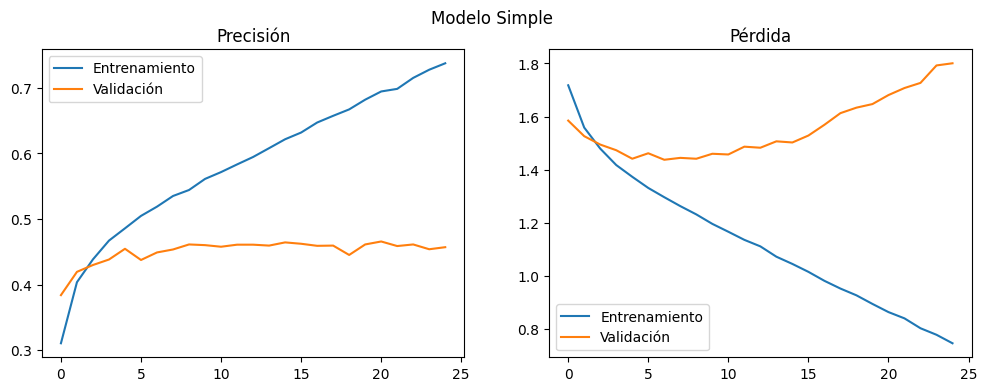

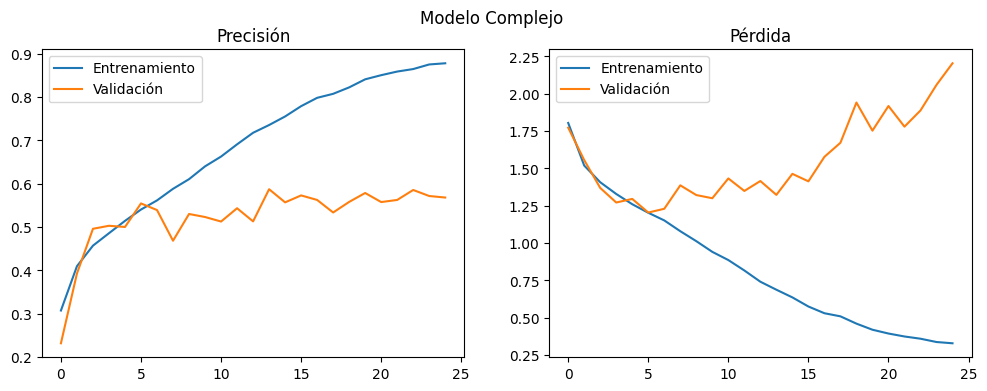

In [14]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))
    plt.suptitle(title)
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.title('Precisión')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.title('Pérdida')
    plt.legend()
    plt.show()

plot_history(history_simple, 'Modelo Simple')
plot_history(history_complex, 'Modelo Complejo')

In [15]:
test_loss_simple, test_acc_simple = model_simple.evaluate(X_test, y_test)
print('Precisión en prueba (Modelo Simple):', test_acc_simple)

test_loss_complex, test_acc_complex = model_complex.evaluate(X_test, y_test)
print('Precisión en prueba (Modelo Complejo):', test_acc_complex)

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4201 - loss: 1.8440
Precisión en prueba (Modelo Simple): 0.46140986680984497
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4808 - loss: 2.7357
Precisión en prueba (Modelo Complejo): 0.562134325504303


In [16]:
y_pred_simple = model_simple.predict(X_test)
y_pred_classes_simple = np.argmax(y_pred_simple, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Modelo Simple')
print(classification_report(y_true, y_pred_classes_simple, target_names=emotions))

y_pred_complex = model_complex.predict(X_test)
y_pred_classes_complex = np.argmax(y_pred_complex, axis=1)

print('Modelo Complejo')
print(classification_report(y_true, y_pred_classes_complex, target_names=emotions))

225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Modelo Simple
              precision    recall  f1-score   support

       angry       0.32      0.37      0.35       958
   disgusted       0.53      0.14      0.23       111
     fearful       0.32      0.32      0.32      1024
       happy       0.64      0.67      0.65      1774
     neutral       0.46      0.36      0.41      1233
         sad       0.35      0.35      0.35      1247
   surprised       0.58      0.65      0.61       831

    accuracy                           0.46      7178
   macro avg       0.46      0.41      0.42      7178
weighted avg       0.46      0.46      0.46      7178

225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step
Modelo Complejo
              precision    recall  f1-score   support

       angry       0.53      0.37      0.44       958
   disgusted       0.82      0.33      0.47       111
     fearful       0.50      0.28      0.36      1024
       happy       0.73      0.82      0.77      1774
     neutral       

### YO

In [21]:
def preprocess_custom_image(img_path):
    img = image.load_img(img_path, color_mode='grayscale', target_size=(img_size, img_size))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

img_path = 'yo_serio.JPG'
custom_img = preprocess_custom_image(img_path)

img_path2 = 'yo_feli.JPG'
custom_img2 = preprocess_custom_image(img_path2)

In [22]:
prediction1_1 = model_simple.predict(custom_img)
predicted_class1_1 = np.argmax(prediction1_1)
print('Emoción Predicha - Simple:', emotions[predicted_class1_1])

prediction = model_complex.predict(custom_img)
predicted_class = np.argmax(prediction)
print('Emoción Predicha - Complejo:', emotions[predicted_class])


prediction2_2 = model_simple.predict(custom_img2)
predicted_class2_2 = np.argmax(prediction2_2)
print('Emoción 2 Predicha - Simple:', emotions[predicted_class2_2])

prediction2 = model_complex.predict(custom_img2)
predicted_class2 = np.argmax(prediction2)
print('Emoción 2 Predicha - Complejo:', emotions[predicted_class2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Emoción Predicha - Simple: fearful
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
Emoción Predicha - Complejo: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Emoción 2 Predicha - Simple: neutral
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Emoción 2 Predicha - Complejo: neutral
